# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

# Observations

* The lat and long range cover the entire Earth, therefore the city function ingested with randomized coordinates will randomly pick cities from every corner of the Earth. We could narrow it down to a specific part of the World to and get a smaller city list to work with.

* From Latitude vs Temperature scatter plot it is clear that the South Hemisphere is warmer than the North Hemisphere despite few outliers. This is because at this time of the year it is summer in South Hemisphere. 

* Although Latitude vs. Humidity does not show clear correlation the further analysis based on the Hemispheres show weak correlation. In North Hemisphere, closer to the equator the less the humidity. There is less data for the South Hemisphere since for the most part it is covered with Ocean bur from the available data we can see that the humidity is more or less identical with some outliers between Lat [-20, -40].

* There is a weak correlation between Cloudiness and the Latitude. Statistically Cloudiness is highest around 60 degrees South but the most of it is covered with Ocean and that information is not available in our dataset.

* It looks like for the most part in the cities in our database the wind speed does not exceed 10 mph. Northern cities tend to have least favorable weather conditions and at and above 50 degrees North the winds get constantly higher. This is especially true for the Southern Hemisphere. Souther we go, greater the wind speed.


In [2]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress
from pprint import pprint
import time
# Import API key
from api_keys import weather_api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [3]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

616

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [4]:
cities_df = pd.DataFrame(columns={"City", "Cloudiness", "Country", "Date", "Humidity", "Lat", "Lng", "Max Temp", "Wind Speed"}, index=np.arange(0, len(cities)))

cities = np.array(cities)
print("Beginning Data Retrieval\n")
set_iter = 1
for index, city in np.ndenumerate(cities):
    internal_city = city
    if len(city.split()) > 1:
        internal_city = "%20".join(city.split())
    url = f"http://api.openweathermap.org/data/2.5/weather?appid={weather_api_key}&q={internal_city}&units=Imperial"
    response = requests.get(url).json()
    time.sleep(1)
    try:
        cities_df.loc[index, "City"] = response['name']
        cities_df.loc[index, "Cloudiness"] = response['clouds']['all']
        cities_df.loc[index, 'Country'] = response['sys']['country']
        cities_df.loc[index, 'Date'] = response['dt']
        cities_df.loc[index, 'Humidity'] = response['main']['humidity']
        cities_df.loc[index, 'Lat'] = response['coord']['lat']
        cities_df.loc[index, 'Lng'] = response['coord']['lon']
        cities_df.loc[index, 'Max Temp'] = response['main']['temp_max']
        cities_df.loc[index, 'Wind Speed'] = response['wind']['speed']
        print(f"Processing Record {index[0]%50 + 1} of Set {set_iter} | {city}")
    except:
        print("City not found. Skipping...")
    
    if (index[0] + 1)%50 == 0:
        set_iter += 1
print("-----------------------------\nData Retrieval Complete\n-----------------------------")

Beginning Data Retrieval

Processing Record 1 of Set 1 | ushuaia
Processing Record 2 of Set 1 | tochio
Processing Record 3 of Set 1 | poum
Processing Record 4 of Set 1 | bluff
Processing Record 5 of Set 1 | rikitea
Processing Record 6 of Set 1 | mossendjo
Processing Record 7 of Set 1 | lamar
Processing Record 8 of Set 1 | sawtell
Processing Record 9 of Set 1 | beaufort
Processing Record 10 of Set 1 | jamestown
Processing Record 11 of Set 1 | gravdal
Processing Record 12 of Set 1 | avarua
Processing Record 13 of Set 1 | victoria
Processing Record 14 of Set 1 | punta arenas
Processing Record 15 of Set 1 | butaritari
Processing Record 16 of Set 1 | mar del plata
Processing Record 17 of Set 1 | lahad datu
Processing Record 18 of Set 1 | cherskiy
Processing Record 19 of Set 1 | neiafu
Processing Record 20 of Set 1 | vemalwada
Processing Record 21 of Set 1 | nara
Processing Record 22 of Set 1 | kalmunai
Processing Record 23 of Set 1 | chokurdakh
Processing Record 24 of Set 1 | sitka
Processi

Processing Record 5 of Set 5 | ostersund
Processing Record 6 of Set 5 | monrovia
Processing Record 7 of Set 5 | kutum
Processing Record 8 of Set 5 | luderitz
Processing Record 9 of Set 5 | chimbote
Processing Record 10 of Set 5 | hanzhong
Processing Record 11 of Set 5 | amapa
Processing Record 12 of Set 5 | garowe
Processing Record 13 of Set 5 | jalu
Processing Record 14 of Set 5 | nome
Processing Record 15 of Set 5 | codrington
Processing Record 16 of Set 5 | mehamn
Processing Record 17 of Set 5 | mayo
Processing Record 18 of Set 5 | azare
Processing Record 19 of Set 5 | kuala terengganu
Processing Record 20 of Set 5 | voh
Processing Record 21 of Set 5 | itapipoca
City not found. Skipping...
Processing Record 23 of Set 5 | ponta delgada
Processing Record 24 of Set 5 | gasa
Processing Record 25 of Set 5 | bubaque
Processing Record 26 of Set 5 | yar-sale
Processing Record 27 of Set 5 | arusha
Processing Record 28 of Set 5 | gualeguay
Processing Record 29 of Set 5 | husavik
Processing Re

Processing Record 10 of Set 9 | inirida
Processing Record 11 of Set 9 | rorvik
Processing Record 12 of Set 9 | guayaramerin
Processing Record 13 of Set 9 | lavrentiya
Processing Record 14 of Set 9 | kharitonovo
Processing Record 15 of Set 9 | albertville
Processing Record 16 of Set 9 | abu kamal
Processing Record 17 of Set 9 | ayagoz
Processing Record 18 of Set 9 | maceio
City not found. Skipping...
Processing Record 20 of Set 9 | calamar
Processing Record 21 of Set 9 | dvorichna
Processing Record 22 of Set 9 | hofn
Processing Record 23 of Set 9 | payakumbuh
Processing Record 24 of Set 9 | san carlos
Processing Record 25 of Set 9 | zyryanka
Processing Record 26 of Set 9 | coquimatlan
Processing Record 27 of Set 9 | nhulunbuy
Processing Record 28 of Set 9 | popondetta
Processing Record 29 of Set 9 | gazanjyk
City not found. Skipping...
Processing Record 31 of Set 9 | clyde
Processing Record 32 of Set 9 | alice springs
Processing Record 33 of Set 9 | belaya gora
Processing Record 34 of S

City not found. Skipping...
Processing Record 13 of Set 13 | ouango
City not found. Skipping...
Processing Record 15 of Set 13 | oni
Processing Record 16 of Set 13 | camacupa
-----------------------------
Data Retrieval Complete
-----------------------------


### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [7]:
# Here we are making sure that the dataframe does not contain any NAN and null values and storing data into csv file
cities_df = cities_df.dropna()
cities_df['parsed_time'] = pd.to_datetime(cities_df['Date'], unit='s')
cities_df.to_csv('cities.csv', index=False)
cities_df

,Max Temp,Cloudiness,Humidity,Country,Wind Speed,Lng,City,Lat,Date,parsed_time
0,50,90,81,AR,28.86,-68.3,Ushuaia,-54.8,1580002384,2020-01-26 01:33:04
1,43,75,60,JP,2.24,139,Tochio,37.47,1580002385,2020-01-26 01:33:05
2,79.77,100,82,NC,21.39,164.02,Poum,-20.23,1580002386,2020-01-26 01:33:06
3,66.49,57,52,NZ,8.52,168.33,Bluff,-46.6,1580002387,2020-01-26 01:33:07
4,79.11,0,77,PF,10.22,-134.97,Rikitea,-23.12,1580002388,2020-01-26 01:33:08
...,...,...,...,...,...,...,...,...,...,...
609,48.15,37,49,BO,5.77,-66.23,Atocha,-20.93,1580003063,2020-01-26 01:44:23
610,84.2,75,89,MY,4.7,114.01,Marabu,4.41,1580003065,2020-01-26 01:44:25
612,66.99,43,30,CF,6.13,22.56,Ouango,4.31,1580003067,2020-01-26 01:44:27
614,15.75,0,73,GE,4.92,43.44,Oni,42.58,1580003069,2020-01-26 01:44:29


In [10]:
cities_df['parsed_time'].mean()

Timestamp('2020-01-26 01:38:08.827225088')

### Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

#### Latitude vs. Temperature Plot

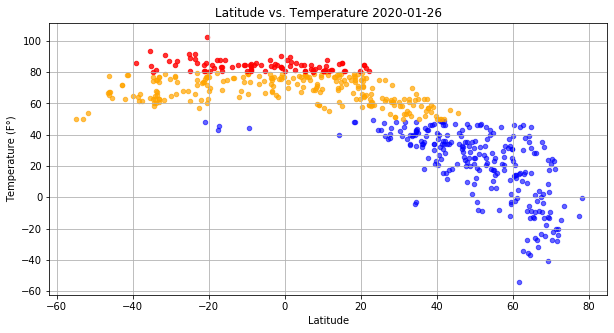

In [14]:
cities_df = pd.read_csv('cities.csv')

plt.figure(figsize=(10,5))

# Set conditions for different climate patterns
cold = cities_df[cities_df['Max Temp'] < 50]
warm = cities_df[(cities_df['Max Temp'] >= 50) & (cities_df['Max Temp'] < 80)]
hot = cities_df[cities_df['Max Temp'] >=80]

temp_date = cities_df['parsed_time'].values[0].split(' ')[0]
#For a better visualization it was decided to assign colors for range of temperatures [Cold, Warm, Hot]
plt.scatter(cold['Lat'], cold['Max Temp'], color = 'b', s=20, alpha=0.6)
plt.scatter(warm['Lat'], warm['Max Temp'], color = 'orange', s=20, alpha=0.7)
plt.scatter(hot['Lat'], hot['Max Temp'], color = 'r', s=20, alpha=0.8)
plt.title(f"Latitude vs. Temperature {temp_date}")
plt.xlabel("Latitude")
plt.ylabel('Temperature (F\N{DEGREE SIGN})')
plt.grid()
plt.show()

#### Latitude vs. Humidity Plot

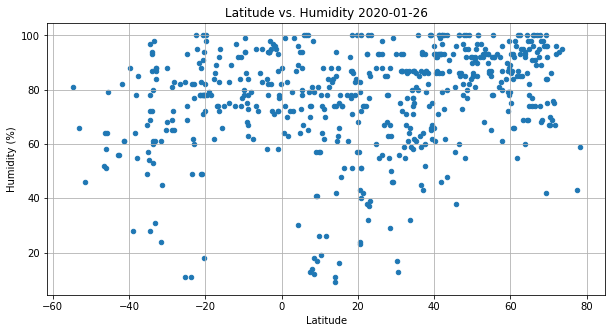

In [15]:
plt.figure(figsize=(10,5))
plt.scatter(cities_df.Lat, cities_df['Humidity'], s=20)
plt.title(f"Latitude vs. Humidity {temp_date}")
plt.xlabel("Latitude")
plt.ylabel('Humidity (%)')
plt.grid()
plt.show()

#### Latitude vs. Cloudiness Plot

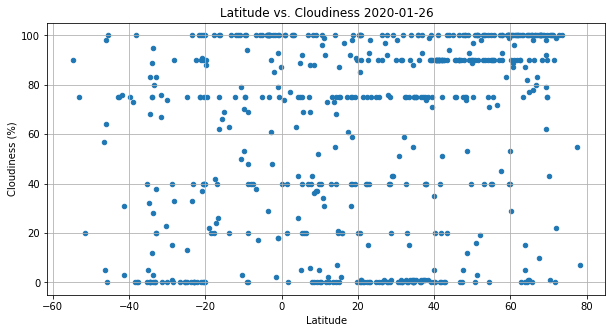

In [16]:
plt.figure(figsize=(10,5))
plt.scatter(cities_df.Lat, cities_df['Cloudiness'], s=20)
plt.title(f"Latitude vs. Cloudiness {temp_date}")
plt.xlabel("Latitude")
plt.ylabel('Cloudiness (%)')
plt.grid()
plt.show()

#### Latitude vs. Wind Speed Plot

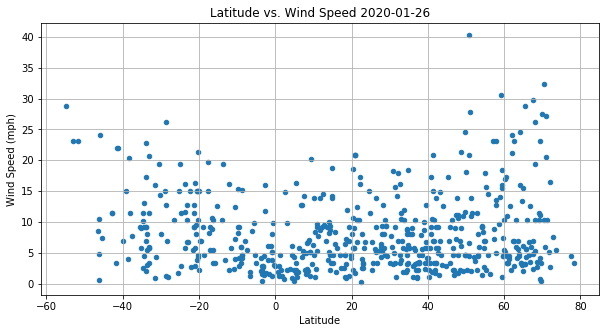

In [17]:
plt.figure(figsize=(10,5))
plt.scatter(cities_df.Lat, cities_df['Wind Speed'],s=20)
plt.title(f"Latitude vs. Wind Speed {temp_date}")
plt.xlabel("Latitude")
plt.ylabel('Wind Speed (mph)')
plt.grid()
plt.show()

## Linear Regression

### OPTIONAL: Create a function to create Linear Regression plots


In [18]:
def lin_regress(x, y):
    slope, intercept, _, _, _ = linregress(x, y)
    fit_model = slope * x + intercept
    return slope, intercept, fit_model
    

In [19]:
# Create Northern and Southern Hemisphere DataFrames
n_hemis_df = cities_df[cities_df['Lat'] > 0]
s_hemis_df = cities_df[cities_df['Lat'] < 0]

####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

Slope = -0.5851879968147013
Intercept: = 62.10181470152132

Correlation between Humidity and Latitute           Max Temp       Lat
Max Temp  1.000000 -0.868779
Lat      -0.868779  1.000000



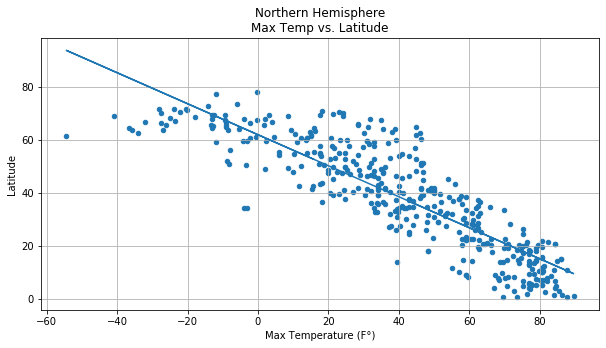

In [144]:
slope, intercept, fit_model = lin_regress(n_hemis_df['Max Temp'], n_hemis_df['Lat'])
print(f"Slope = {slope}\nIntercept: = {intercept}\n")
print(f"Correlation between Humidity and Latitute {n_hemis_df[['Max Temp', 'Lat']].corr()}\n")


plt.figure('north',figsize=(10,5))
plt.title('Northern Hemisphere\nMax Temp vs. Latitude')
plt.xlabel("Max Temperature (F\N{DEGREE SIGN})")
plt.ylabel('Latitude')

cold_n = n_hemis_df[n_hemis_df['Max Temp'] < 50]
warm_n = n_hemis_df[(n_hemis_df['Max Temp'] >= 50) & (n_hemis_df['Max Temp'] < 80)]
hot_n = n_hemis_df[n_hemis_df['Max Temp'] >=80]

plt.grid()
plt.scatter(n_hemis_df['Max Temp'],n_hemis_df['Lat'], s=20)
plt.plot(n_hemis_df['Max Temp'], fit_model)

plt.show()

####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

Slope = 0.45403012717505625
Intercept: = -54.801214412113154

Correlation between Humidity and Latitute           Max Temp       Lat
Max Temp  1.000000  0.344725
Lat       0.344725  1.000000



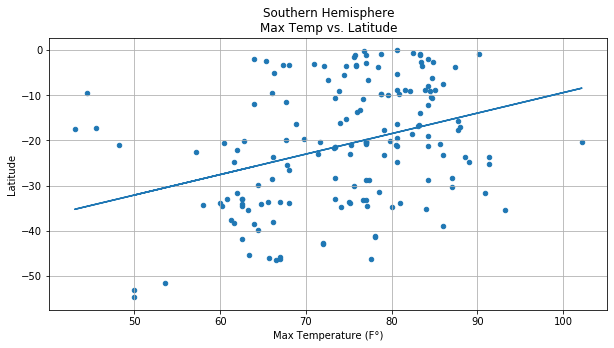

In [143]:
slope, intercept,fit_model = lin_regress(s_hemis_df['Max Temp'],s_hemis_df['Lat'])
print(f"Slope = {slope}\nIntercept: = {intercept}\n")
print(f"Correlation between Humidity and Latitute {s_hemis_df[['Max Temp', 'Lat']].corr()}\n")

plt.figure('south',figsize=(10,5))

plt.title('Southern Hemisphere\nMax Temp vs. Latitude')
plt.xlabel("Max Temperature (F\N{DEGREE SIGN})")
plt.ylabel('Latitude')

plt.grid()
plt.scatter(s_hemis_df['Max Temp'],s_hemis_df['Lat'], s=20)
plt.plot(s_hemis_df['Max Temp'], fit_model)

plt.show()

####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

Slope = 0.35636610636811084
Intercept: = 10.565547721382675

Correlation between Humidity and Latitute           Humidity       Lat
Humidity  1.000000  0.346643
Lat       0.346643  1.000000



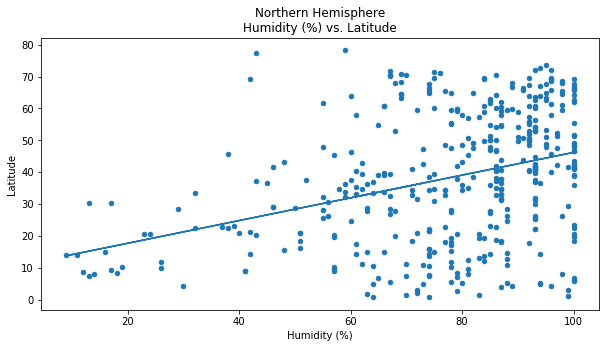

In [142]:
slope, intercept, fit_model = lin_regress(n_hemis_df['Humidity'], n_hemis_df['Lat'])
print(f"Slope = {slope}\nIntercept: = {intercept}\n")
print(f"Correlation between Humidity and Latitute {n_hemis_df[['Humidity', 'Lat']].corr()}\n")

plt.figure(figsize=(10,5))
plt.title('Northern Hemisphere\nHumidity (%) vs. Latitude')
plt.xlabel("Humidity (%)")
plt.ylabel('Latitude')

plt.scatter(n_hemis_df['Humidity'],n_hemis_df['Lat'], s=20)
plt.plot(n_hemis_df['Humidity'], fit_model)

plt.show()

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

Slope = 0.29626910335572454
Intercept: = -43.286427808857276

Correlation between Humidity and Latitute           Humidity       Lat
Humidity  1.000000  0.383607
Lat       0.383607  1.000000



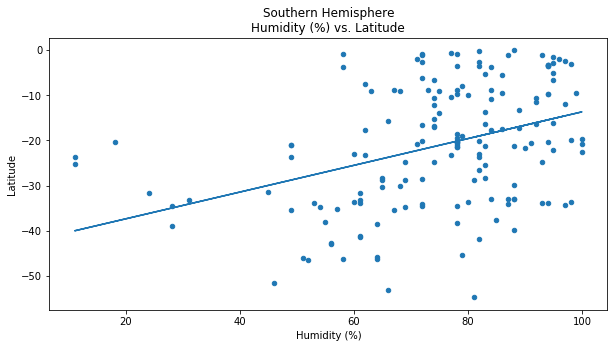

In [141]:
slope, intercept, fit_model = lin_regress(s_hemis_df['Humidity'], s_hemis_df['Lat'])
print(f"Slope = {slope}\nIntercept: = {intercept}\n")
print(f"Correlation between Humidity and Latitute {s_hemis_df[['Humidity', 'Lat']].corr()}\n")

plt.figure(figsize=(10,5))
plt.title('Southern Hemisphere\nHumidity (%) vs. Latitude')
plt.xlabel("Humidity (%)")
plt.ylabel('Latitude')

plt.scatter(s_hemis_df['Humidity'], s_hemis_df['Lat'], s=20)
plt.plot(s_hemis_df['Humidity'], fit_model)

plt.show()

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

Slope = 0.15065892119270022
Intercept: = 28.904339455739922

Correlation between Humidity and Latitute             Cloudiness       Lat
Cloudiness    1.000000  0.285751
Lat           0.285751  1.000000



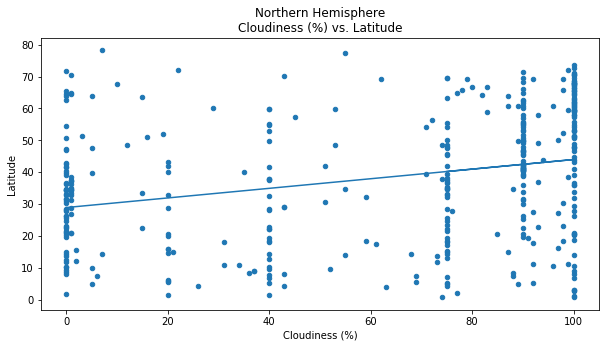

In [140]:
slope, intercept, fit_model = lin_regress(n_hemis_df['Cloudiness'], n_hemis_df['Lat'])
print(f"Slope = {slope}\nIntercept: = {intercept}\n")
print(f"Correlation between Humidity and Latitute {n_hemis_df[['Cloudiness', 'Lat']].corr()}\n")

plt.figure(figsize=(10,5))

plt.title('Northern Hemisphere\nCloudiness (%) vs. Latitude')
plt.xlabel("Cloudiness (%)")
plt.ylabel('Latitude')

plt.scatter(n_hemis_df['Cloudiness'],n_hemis_df['Lat'], s=20)
plt.plot(n_hemis_df['Cloudiness'], fit_model)

plt.show()

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

Slope = 0.10391253647689573
Intercept: = -26.530158716144797

Correlation between Humidity and Latitute             Cloudiness       Lat
Cloudiness    1.000000  0.288979
Lat           0.288979  1.000000



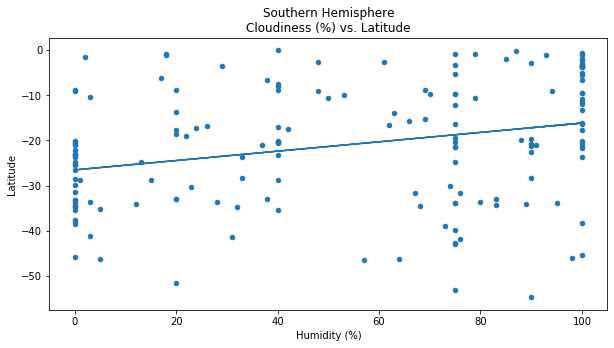

In [145]:
slope, intercept, fit_model = lin_regress(s_hemis_df['Cloudiness'], s_hemis_df['Lat'])
print(f"Slope = {slope}\nIntercept: = {intercept}\n")
print(f"Correlation between Humidity and Latitute {s_hemis_df[['Cloudiness', 'Lat']].corr()}\n")


plt.figure(figsize=(10,5))

plt.title('Southern Hemisphere\nCloudiness (%) vs. Latitude')
plt.xlabel("Humidity (%)")
plt.ylabel('Latitude')

plt.scatter(s_hemis_df['Cloudiness'], s_hemis_df['Lat'], s=20)
plt.plot(s_hemis_df['Cloudiness'], fit_model)

plt.show()

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

Slope = 0.7014041043327937
Intercept: = 32.66370745912515

Correlation between Wind Speed and Latitute             Wind Speed     Lat
Wind Speed      1.0000  0.2148
Lat             0.2148  1.0000



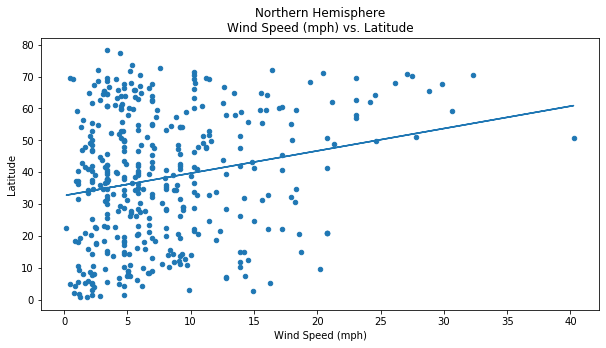

In [136]:
slope, intercept,fit_model = lin_regress(n_hemis_df['Wind Speed'], n_hemis_df['Lat'])
print(f"Slope = {slope}\nIntercept: = {intercept}\n")
print(f"Correlation between Wind Speed and Latitute {n_hemis_df[['Wind Speed', 'Lat']].corr()}\n")

plt.figure(figsize=(10,5))

plt.title('Northern Hemisphere\nWind Speed (mph) vs. Latitude')
plt.xlabel("Wind Speed (mph)")
plt.ylabel('Latitude')

plt.scatter(n_hemis_df['Wind Speed'],n_hemis_df['Lat'], s=20)
plt.plot(n_hemis_df['Wind Speed'], fit_model)

plt.show()

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

Slope = -0.9275395101479985
Intercept: = -12.998424265662008

Correlation between Wind Speed and Latitute             Wind Speed       Lat
Wind Speed    1.000000 -0.414322
Lat          -0.414322  1.000000



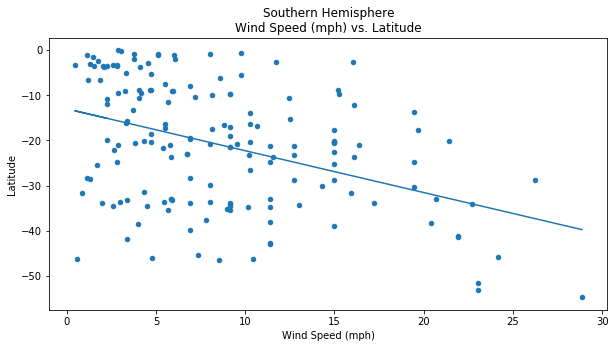

In [134]:
slope, intercept, fit_model = lin_regress(s_hemis_df['Wind Speed'], s_hemis_df['Lat'])
print(f"Slope = {slope}\nIntercept: = {intercept}\n")
print(f"Correlation between Wind Speed and Latitute {s_hemis_df[['Wind Speed', 'Lat']].corr()}\n")


plt.figure(figsize=(10,5))

plt.title('Southern Hemisphere\nWind Speed (mph) vs. Latitude')
plt.xlabel("Wind Speed (mph)")
plt.ylabel('Latitude')

plt.scatter(s_hemis_df['Wind Speed'], s_hemis_df['Lat'], s=20)
plt.plot(s_hemis_df['Wind Speed'], fit_model)
plt.show()